In [75]:
# description: this program uses the dual moving average crossover to determine when to buy and sell stock

In [76]:
# import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [77]:
# load the data
import pandas_datareader as web
df = web.DataReader('AAPL', data_source='yahoo', start='2015-08-01', end='2020-08-01')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-03,122.570000,117.519997,121.500000,118.440002,69976000.0,109.155342
2015-08-04,117.699997,113.250000,117.419998,114.639999,124138600.0,105.653229
2015-08-05,117.440002,112.099998,112.949997,115.400002,99312600.0,106.353653
2015-08-06,116.500000,114.120003,115.970001,115.129997,52903000.0,106.585083
2015-08-07,116.250000,114.500000,114.580002,115.519997,38670400.0,106.946136
...,...,...,...,...,...,...
2020-07-27,379.619995,373.920013,374.839996,379.239990,30303500.0,379.239990
2020-07-28,378.200012,372.989990,377.470001,373.010010,25906400.0,373.010010
2020-07-29,380.920013,374.850006,375.000000,380.160004,22582300.0,380.160004


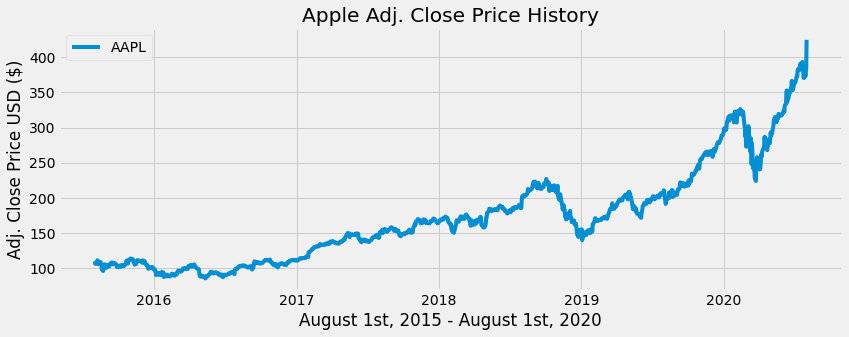

In [78]:
# visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('August 1st, 2015 - August 1st, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [79]:
# create the simply moving average with a 30 day window
sma30 = pd.DataFrame()
sma30['Adj Close Price'] = df['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close Price
Date,
2015-08-03,NaN
2015-08-04,NaN
2015-08-05,NaN
2015-08-06,NaN
2015-08-07,NaN
...,...
2020-07-27,370.849331
2020-07-28,371.849998
2020-07-29,372.785999


In [80]:
# create a simple moving 100 day average
sma100 = pd.DataFrame()
sma100['Adj Close Price'] = df['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close Price
Date,
2015-08-03,NaN
2015-08-04,NaN
2015-08-05,NaN
2015-08-06,NaN
2015-08-07,NaN
...,...
2020-07-27,312.246886
2020-07-28,313.055694
2020-07-29,313.974797


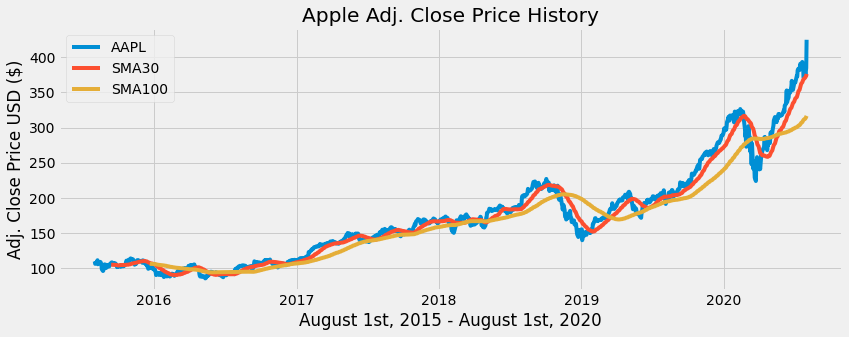

In [81]:
# visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['Adj Close'], label = 'AAPL')
plt.plot(sma30['Adj Close Price'], label = 'SMA30')
plt.plot(sma100['Adj Close Price'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('August 1st, 2015 - August 1st, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [82]:
# create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = df['Adj Close']
data['sma30'] = df['Adj Close']
data['sma100'] = df['Adj Close']
data

,AAPL,sma30,sma100
Date,,,
2015-08-03,109.155342,109.155342,109.155342
2015-08-04,105.653229,105.653229,105.653229
2015-08-05,106.353653,106.353653,106.353653
2015-08-06,106.585083,106.585083,106.585083
2015-08-07,106.946136,106.946136,106.946136
...,...,...,...
2020-07-27,379.239990,379.239990,379.239990
2020-07-28,373.010010,373.010010,373.010010
2020-07-29,380.160004,380.160004,380.160004


In [83]:
# create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['sma30'][i] > data['sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['sma30'][i] < data['sma100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [84]:
# store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [85]:
# show the data
data

,AAPL,sma30,sma100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2015-08-03,109.155342,109.155342,109.155342,NaN,NaN
2015-08-04,105.653229,105.653229,105.653229,NaN,NaN
2015-08-05,106.353653,106.353653,106.353653,NaN,NaN
2015-08-06,106.585083,106.585083,106.585083,NaN,NaN
2015-08-07,106.946136,106.946136,106.946136,NaN,NaN
...,...,...,...,...,...
2020-07-27,379.239990,379.239990,379.239990,NaN,NaN
2020-07-28,373.010010,373.010010,373.010010,NaN,NaN
2020-07-29,380.160004,380.160004,380.160004,NaN,NaN


In [86]:
# visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['sma30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['sma100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('August 1st, 2015 - August 1st, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

ConversionError: ignored

<Figure size 900x324 with 1 Axes>